<a href="https://colab.research.google.com/github/Merhbene/holbertonschool-machine_learning/blob/main/0x01_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 0. Initialize K-means

In [1]:
import numpy as np

In [2]:
def initialize(X, k):
  n, d = X.shape
  low = np.amin(X, 0)
  high = np.amax(X, 0)
  cluster_centroids = np.random.uniform(low, high, size=(k, d))
  return cluster_centroids



In [3]:
np.random.uniform(low=0, high=1, size=(3,2))

array([[0.39694877, 0.94117006],
       [0.82666558, 0.78285298],
       [0.38770041, 0.46882582]])

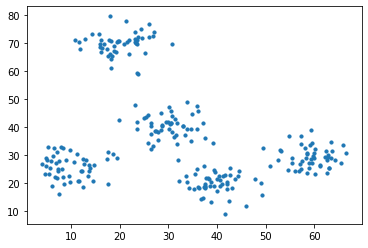

[[14.54730144 13.46780434]
 [20.57098466 33.55245039]
 [ 9.55556506 51.51143281]
 [48.72458008 20.03154959]
 [25.43826106 60.35542243]]


In [4]:
import numpy as np
import matplotlib.pyplot as plt

if __name__ == "__main__":
    np.random.seed(0)
    a = np.random.multivariate_normal([30, 40], [[16, 0], [0, 16]], size=50)
    b = np.random.multivariate_normal([10, 25], [[16, 0], [0, 16]], size=50)
    c = np.random.multivariate_normal([40, 20], [[16, 0], [0, 16]], size=50)
    d = np.random.multivariate_normal([60, 30], [[16, 0], [0, 16]], size=50)
    e = np.random.multivariate_normal([20, 70], [[16, 0], [0, 16]], size=50)
    X = np.concatenate((a, b, c, d, e), axis=0)
    np.random.shuffle(X)
    plt.scatter(X[:, 0], X[:, 1], s=10)
    plt.show()
    print(initialize(X, 5))

## 1. K-means

In [5]:
A = X[:5, :4]

In [6]:
A.shape

(5, 2)

In [7]:
B = initialize(X, 3)

In [8]:
B.shape

(3, 2)

In [9]:
(A[:, None, :] - B[None, :, :]).sum(axis=-1).shape

(5, 3)

In [10]:
dist = np.square(A[:, None, :] - B[None, :, :]).sum(axis=-1)
min = np.argmin(dist, axis=1)

In [11]:
min

array([1, 1, 0, 0, 1])

In [12]:
c = np.argwhere(min == 1)

In [13]:
c.shape

(3, 1)

In [14]:
c.reshape(-1).shape

(3,)

In [15]:
L = [A[i] for i in c]

In [16]:
L

[array([[28.45069273, 38.790789  ]]),
 array([[34.55760274, 35.06069672]]),
 array([[49.36331105, 32.4252781 ]])]

In [17]:
A

array([[28.45069273, 38.790789  ],
       [34.55760274, 35.06069672],
       [15.9278325 , 69.68858098],
       [36.13111686, 45.87743508],
       [49.36331105, 32.4252781 ]])

In [18]:
z = np.array(L)

In [19]:
z

array([[[28.45069273, 38.790789  ]],

       [[34.55760274, 35.06069672]],

       [[49.36331105, 32.4252781 ]]])

In [20]:
np.mean(z, axis=0)

array([[37.45720217, 35.42558794]])

In [21]:
np.random.uniform(0, 1, size=3)

array([0.51713728, 0.75510618, 0.03227329])

In [22]:

def kmeans(X, k, iterations=1000):
    "performs K-means on a dataset"
    if type(X) is not np.ndarray or X.ndim != 2:
        return None, None
    if type(k) is not int  or k < 1:
        return None, None
    if type(iterations) is not int or iterations < 1:
        return None, None
    _, d = X.shape
    mins = np.min(X, axis=0)
    maxs = np.max(X, axis=0)
    
    centroids = np.random.uniform(mins, maxs, size=(k, d))
    new_centroids = centroids.copy()
    for i in range(iterations):
        
        dist = np.square(X[:, None, :] - centroids[None, :, :]).sum(axis=-1)
        clss = np.argmin(dist, axis=1)
        

        for c in range(k):
            indices = np.argwhere(clss == c).reshape(-1)
            #centroids[indices] = np.mean(x[indices], axis=0)
            if len(X[indices]) > 0:
                new_centroids[c] = np.mean(X[indices], axis=0)
            else:
                new_centroids[c] = np.random.uniform(mins, maxs)
            

        if np.array_equal(centroids, new_centroids):
            break
        centroids = new_centroids.copy()
    
    return centroids, clss


[[ 9.92511389 25.73098987]
 [30.06722465 40.41123947]
 [39.62770705 19.89843487]
 [59.22766628 29.19796006]
 [20.0835633  69.81592298]]


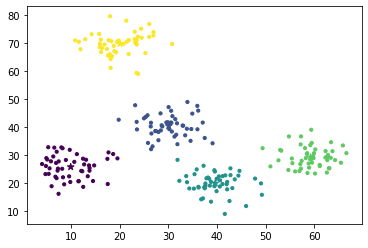

In [23]:

import numpy as np
import matplotlib.pyplot as plt

if __name__ == "__main__":
    np.random.seed(0)
    a = np.random.multivariate_normal([30, 40], [[16, 0], [0, 16]], size=50)
    b = np.random.multivariate_normal([10, 25], [[16, 0], [0, 16]], size=50)
    c = np.random.multivariate_normal([40, 20], [[16, 0], [0, 16]], size=50)
    d = np.random.multivariate_normal([60, 30], [[16, 0], [0, 16]], size=50)
    e = np.random.multivariate_normal([20, 70], [[16, 0], [0, 16]], size=50)
    X = np.concatenate((a, b, c, d, e), axis=0)
    np.random.shuffle(X)
    C, clss = kmeans(X, 5)
    print(C)
    plt.scatter(X[:, 0], X[:, 1], s=10, c=clss)
    plt.scatter(C[:, 0], C[:, 1], s=50, marker='*', c=list(range(5)))
    plt.show()

In [24]:
"""
#!/usr/bin/env python3
"K-means"
import numpy as np


def kmeans(X, k, iterations=1000):
    "performs K-means on a dataset"
    if type(X) is not np.ndarray or X.ndim != 2:
        return None, None
    if type(k) is not int  or k < 1:
        return None, None
    if type(iterations) is not int or iterations < 1:
        return None, None
    _, d = X.shape

    centroids = initialize(X, k)
    new_centroids = centroids.copy()
    for i in range(iterations):
        
        dist = np.square(X[:, None, :] - centroids[None, :, :]).sum(axis=-1)
        clss = np.argmin(dist, axis=1)
        

        for c in range(k):
            indices = np.argwhere(clss == c).reshape(-1)
            #centroids[indices] = np.mean(x[indices], axis=0)
            if len(X[indices]) > 0:
                new_centroids[c] = np.mean(X[indices], axis=0)
            else:
                new_centroids[c] = initialize(X, 1)
            

        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids.copy()
    return centroids, clss


def initialize(X, k):
    " initializes cluster centroids for K-means"
    if type(X) is not np.ndarray or X.ndim != 2:
        return None
    if type(k) is not int or k < 1:
        return None
    _, d = X.shape
    low = np.amin(X, 0)
    high = np.amax(X, 0)
    cluster_centroids = np.random.uniform(low, high, size=(k, d))
    return cluster_centroids
"""

'\n#!/usr/bin/env python3\n"K-means"\nimport numpy as np\n\n\ndef kmeans(X, k, iterations=1000):\n    "performs K-means on a dataset"\n    if type(X) is not np.ndarray or X.ndim != 2:\n        return None, None\n    if type(k) is not int  or k < 1:\n        return None, None\n    if type(iterations) is not int or iterations < 1:\n        return None, None\n    _, d = X.shape\n\n    centroids = initialize(X, k)\n    new_centroids = centroids.copy()\n    for i in range(iterations):\n        \n        dist = np.square(X[:, None, :] - centroids[None, :, :]).sum(axis=-1)\n        clss = np.argmin(dist, axis=1)\n        \n\n        for c in range(k):\n            indices = np.argwhere(clss == c).reshape(-1)\n            #centroids[indices] = np.mean(x[indices], axis=0)\n            if len(X[indices]) > 0:\n                new_centroids[c] = np.mean(X[indices], axis=0)\n            else:\n                new_centroids[c] = initialize(X, 1)\n            \n\n        if np.allclose(centroids, ne

## 2. Variance

In [25]:
def variance(X, C):
    if type(X) is not np.ndarray or X.ndim != 2:
        return None
    if type(C) is not np.ndarray or C.ndim != 2 or C.shape[1] != X.shape[1]:
        return None
    dist = np.square(X[:, None, :] - C[None, :, :]).sum(axis=-1)
    centroid_dist = np.min(dist, axis=1)    
    var = np.sum(centroid_dist)
    return var


In [26]:
np.random.seed(0)
a = np.random.multivariate_normal([30, 40], [[16, 0], [0, 16]], size=50)
b = np.random.multivariate_normal([10, 25], [[16, 0], [0, 16]], size=50)
c = np.random.multivariate_normal([40, 20], [[16, 0], [0, 16]], size=50)
d = np.random.multivariate_normal([60, 30], [[16, 0], [0, 16]], size=50)
e = np.random.multivariate_normal([20, 70], [[16, 0], [0, 16]], size=50)
X = np.concatenate((a, b, c, d, e), axis=0)
np.random.shuffle(X)

for k in range(1, 11):
    C, _ = kmeans(X, k)
    print('Variance with {} clusters: {}'.format(k, variance(X, C).round(5)))

Variance with 1 clusters: 157927.7052
Variance with 2 clusters: 82095.68297
Variance with 3 clusters: 34784.23723
Variance with 4 clusters: 23158.40095
Variance with 5 clusters: 7868.52123
Variance with 6 clusters: 7406.93077
Variance with 7 clusters: 6930.66361
Variance with 8 clusters: 6162.15884
Variance with 9 clusters: 5843.92455
Variance with 10 clusters: 5727.41124


## 3. Optimize k

In [27]:
#!/usr/bin/env python3
"""optimum"""
import numpy as np


def optimum_k(X, kmin=1, kmax=None, iterations=1000):
    "tests for the optimum nb of clusters by variance"
    if type(X) is not np.ndarray or X.ndim != 2:
        return None, None
    if type(kmin) is not int or kmin < 1:
        return None, None
    if kmax is None:
        kmax = X.shape[0] 
    if type(kmax) is not int or kmax < 1:
        return None, None
    if kmax <= kmin:
        return None, None
    if type(iterations) is not int or iterations < 1:
        return None, None

    results = []
    var = []
    for k in range(kmin, kmax + 1):
        C, clss = kmeans(X, k, iterations)
        results.append((C, clss))
        var.append(variance(X, C))
    d0 = var[0]
    d_vars = [d0 - v for v in var]
    return results, d_vars


[(array([[31.78625503, 37.01090945]]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])), (array([[34.76990289, 28.71421162],
       [20.14417812, 69.38429903]]), array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,

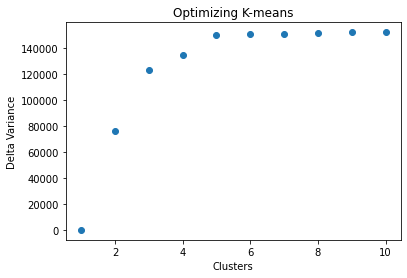

In [28]:
np.random.seed(0)
a = np.random.multivariate_normal([30, 40], [[16, 0], [0, 16]], size=50)
b = np.random.multivariate_normal([10, 25], [[16, 0], [0, 16]], size=50)
c = np.random.multivariate_normal([40, 20], [[16, 0], [0, 16]], size=50)
d = np.random.multivariate_normal([60, 30], [[16, 0], [0, 16]], size=50)
e = np.random.multivariate_normal([20, 70], [[16, 0], [0, 16]], size=50)
X = np.concatenate((a, b, c, d, e), axis=0)
np.random.shuffle(X)

results, d_vars = optimum_k(X, kmax=10)
print(results)
print(np.round(d_vars, 5))
plt.scatter(list(range(1, 11)), d_vars)
plt.xlabel('Clusters')
plt.ylabel('Delta Variance')
plt.title('Optimizing K-means')
plt.show()

## 4. Initialize GMM


In [29]:
def initialize(X, k):
    """initializes variables for a Gaussian Mixture Model"""
    _,  d = X.shape
    if type(X) is not np.ndarray or X.ndim != 2:
        return None, None, None
    if type(k) is not int or k < 1:
        return None, None, None
    pi = np.full(k, 1/k) # a new array of shape k filled with 1/k
    m, _ = kmeans(X, k)
    # S = np.array([np.eye(d) for i in range(k)])   
    S = np.tile(np.eye(d), (k, 1, 1))
    return pi, m, S





In [30]:

if __name__ == '__main__':
    np.random.seed(11)
    a = np.random.multivariate_normal([30, 40], [[75, 5], [5, 75]], size=10000)
    b = np.random.multivariate_normal([5, 25], [[16, 10], [10, 16]], size=750)
    c = np.random.multivariate_normal([60, 30], [[16, 0], [0, 16]], size=750)
    d = np.random.multivariate_normal([20, 70], [[35, 10], [10, 35]], size=1000)
    X = np.concatenate((a, b, c, d), axis=0)
    np.random.shuffle(X)
    pi, m, S = initialize(X, 4)
    print(pi)
    print(m)
    print(S)

[0.25 0.25 0.25 0.25]
[[54.73711515 31.81393242]
 [16.84012557 31.20248225]
 [21.43215816 65.50449077]
 [32.3301925  41.80664127]]
[[[1. 0.]
  [0. 1.]]

 [[1. 0.]
  [0. 1.]]

 [[1. 0.]
  [0. 1.]]

 [[1. 0.]
  [0. 1.]]]


## 5. PDF

In [31]:
a = np.arange(2 * 4 ).reshape((2, 4))
b = np.arange(2 * 4).reshape(( 2, 4))

In [32]:
a.shape, b.shape

((2, 4), (2, 4))

In [33]:
np.matmul(a.T,b).shape

(4, 4)

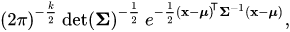

In [34]:
def pdf(X, m, S):
    """calculate the pdf of the multinormal distribution"""
    if type(X) is not np.ndarray or X.ndim != 2:
        return None
    d = X.shape[1]
    if type(m) is not np.ndarray or m.ndim != 1 or m.shape[0] != d:
        return None
    if type(S) is not np.ndarray or S.ndim != 2 or S.shape != (d, d):
        return None

    Xm = X - m
    e = - 0.5 * np.sum(Xm * np.matmul(np.linalg.inv(S), Xm.T).T, axis=1)
    num = np.exp(e)
    det = np.linalg.det(S)
    prob = num / np.sqrt(((2 * np.pi) ** d) * det)
    return  np.maximum(prob, 1e-300) # should have a minimum value of 1e-300

In [35]:
if __name__ == '__main__':
 
    np.random.seed(0)
    m = np.array([12, 30, 10])
    S = np.array([[36, -30, 15], [-30, 100, -20], [15, -20, 25]])
    X = np.random.multivariate_normal(m, S, 10000)
    P = pdf(X, m, S)
    print(P)

[3.47450910e-05 2.53649178e-06 1.80348301e-04 ... 1.24604061e-04
 1.86345129e-04 2.59397003e-05]


# 6. Expectation

In [36]:
#!/usr/bin/env python3
""" Expectation"""
import numpy as np


def expectation(X, pi, m, S):
    """calculate the expectation step in the EM algorithm for a GMM"""
    if type(X) is not np.ndarray or X.ndim != 2:
        return None, None
    d = X.shape[1]
    if type(pi) is not np.ndarray or pi.ndim != 1 or not np.isclose(np.sum(pi), 1):
        return None, None
    k = pi.shape[0]
    if type(m) is not np.ndarray or m.ndim != 2 or m.shape != (k, d):
        return None, None
    if type(S) is not np.ndarray or S.ndim != 3 or S.shape != (k, d, d):
        return None, None

    n = X.shape[0]
    k = pi.shape[0]
    g = np.zeros((k, n))

    for i in range(k):
        g[i] = pi[i] * pdf(X, m[i], S[i])
    l = np.sum(g, axis=0, keepdims=True)
    g = g / l
    return g, np.sum(np.log(l))


In [37]:
np.random.seed(11)
a = np.random.multivariate_normal([30, 40], [[75, 5], [5, 75]], size=10000)
b = np.random.multivariate_normal([5, 25], [[16, 10], [10, 16]], size=750)
c = np.random.multivariate_normal([60, 30], [[16, 0], [0, 16]], size=750)
d = np.random.multivariate_normal([20, 70], [[35, 10], [10, 35]], size=1000)
X = np.concatenate((a, b, c, d), axis=0)
np.random.shuffle(X)
pi, m, S = initialize(X, 4)
g, l = expectation(X, pi, m, S)
print(g)
print(np.sum(g, axis=0))
print(l)

[[1.98542668e-055 1.00000000e+000 1.56526421e-185 ... 1.00000000e+000
  3.70567311e-236 1.91892348e-012]
 [6.97883333e-085 2.28658376e-279 9.28518983e-065 ... 8.12227631e-287
  1.53690661e-032 3.17417182e-181]
 [9.79811365e-234 2.28658376e-279 2.35073465e-095 ... 1.65904890e-298
  9.62514613e-068 5.67072057e-183]
 [1.00000000e+000 7.21133039e-186 1.00000000e+000 ... 2.42138447e-125
  1.00000000e+000 1.00000000e+000]]
[1. 1. 1. ... 1. 1. 1.]
-652797.7866541843


## 7. Maximization

In [38]:
#!/usr/bin/env python3
""" Maximization """
import numpy as np

def maximization(X, g):
    """calculate maximization of all points"""
    if type(X) is not np.ndarray or X.ndim != 2:
        return None, None, None
    n, d = X.shape
    if type(g) is not np.ndarray or g.ndim != 2 or g.shape[1] != n or not np.allclose(np.sum(g, axis=0), np.ones(g.shape[1])):
        return None, None, None
    k = g.shape[0]
    m = np.zeros((k, d))
    S = np.zeros((k, d, d))

    nk = np.sum(g, axis=1)
    pi = nk / n
    
    for i in range(k):
        gi = g[i].reshape((-1, 1))
        m[i] = np.sum(gi * X, axis=0) / nk[i]
        Xm = X - m[i]
        S[i] = np.matmul(Xm.T, Xm * gi) / nk[i]
    return pi, m, S


In [39]:
if __name__ == '__main__':
    np.random.seed(11)
    a = np.random.multivariate_normal([30, 40], [[75, 5], [5, 75]], size=10000)
    b = np.random.multivariate_normal([5, 25], [[16, 10], [10, 16]], size=750)
    c = np.random.multivariate_normal([60, 30], [[16, 0], [0, 16]], size=750)
    d = np.random.multivariate_normal([20, 70], [[35, 10], [10, 35]], size=1000)
    X = np.concatenate((a, b, c, d), axis=0)
    np.random.shuffle(X)
    pi, m, S = initialize(X, 4)
    g, _ = expectation(X, pi, m, S)
    pi, m, S = maximization(X, g)
    print(pi)
    print(m)
    print(S)

[0.10104901 0.24748822 0.1193333  0.53212947]
[[54.7440558  31.80888393]
 [16.84099873 31.20560148]
 [21.42588061 65.51441875]
 [32.33208369 41.80830251]]
[[[64.05063663 -2.13941814]
  [-2.13941814 41.90354928]]

 [[72.72404579  9.96322554]
  [ 9.96322554 53.05035303]]

 [[46.20933259  1.08979413]
  [ 1.08979413 66.9841323 ]]

 [[35.04054823 -0.94790014]
  [-0.94790014 45.14948772]]]


## 8. EM

In [40]:
#!/usr/bin/env python3
"""EM"""
import numpy as np


def expectation_maximization(X, k, iterations=1000, tol=1e-5, verbose=False):
    """performs the EM algorithm"""
    if type(X) is not np.ndarray or X.ndim != 2:
        return None, None, None, None, None
    if type(k) is not int or int(k) != k or k < 1:
        return None, None, None, None, None
    if type(iterations) is not int or int(iterations) != iterations or iterations < 1:
        return None, None, None, None, None
    if type(tol) is not float or tol < 0:
        return None, None, None, None, None
    if type(verbose) is not bool:
        return None, None, None, None, None
    pi, m, S = initialize(X, k)
    lo = None
    for i in range(iterations):
        g, l = expectation(X, pi, m, S)
        if lo is not None and np.abs(l - lo) <= tol:
            if verbose:
                print('Log Likelihood after {} iterations: {}'.format(i, l.round(5)))
            break
        if verbose and i % 10 == 0:
            print('Log Likelihood after {} iterations: {}'.format(i, l.round(5)))
        pi, m, S = maximization(X, g)
        lo = l
    else:
        g, l = expectation(X, pi, m, S)
        if verbose:
            print('Log Likelihood after {} iterations: {}'.format(iterations, l.round(5)))
    return pi, m, S, g, l


Log Likelihood after 0 iterations: -652797.78665
Log Likelihood after 10 iterations: -94855.45662
Log Likelihood after 20 iterations: -94714.52057
Log Likelihood after 30 iterations: -94590.87362
Log Likelihood after 40 iterations: -94440.40559
Log Likelihood after 50 iterations: -94439.93891
Log Likelihood after 52 iterations: -94439.93889


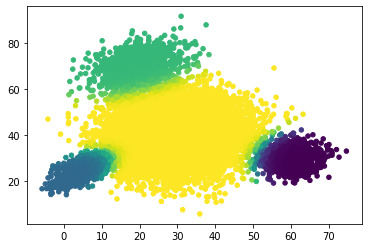

[ 761.03239903  747.62391034 1005.60275934 9985.74093129]
[[60.18888335 30.19707607]
 [ 5.05794926 24.92588821]
 [20.03438453 69.84721009]
 [29.89607379 40.12519148]]
[[[16.85183426  0.2547388 ]
  [ 0.2547388  16.49432111]]

 [[15.19555672  9.62661086]
  [ 9.62661086 15.47295413]]

 [[35.58332494 11.08419454]
  [11.08419454 33.09463207]]

 [[74.52083678  5.20755533]
  [ 5.20755533 73.87299705]]]
-94439.93889004056


In [41]:
if __name__ == '__main__':
    np.random.seed(11)
    a = np.random.multivariate_normal([30, 40], [[75, 5], [5, 75]], size=10000)
    b = np.random.multivariate_normal([5, 25], [[16, 10], [10, 16]], size=750)
    c = np.random.multivariate_normal([60, 30], [[16, 0], [0, 16]], size=750)
    d = np.random.multivariate_normal([20, 70], [[35, 10], [10, 35]], size=1000)
    X = np.concatenate((a, b, c, d), axis=0)
    np.random.shuffle(X)
    k = 4
    pi, m, S, g, l = expectation_maximization(X, k, 150, verbose=True)
    clss = np.sum(g * np.arange(k).reshape(k, 1), axis=0)
    plt.scatter(X[:, 0], X[:, 1], s=20, c=clss)
    plt.scatter(m[:, 0], m[:, 1], s=50, c=np.arange(k), marker='*')
    plt.show()
    print(X.shape[0] * pi)
    print(m)
    print(S)
    print(l)

## 9-BIC.py

In [42]:
#!/usr/bin/env python3
""" BIC """
import numpy as np


def BIC(X, kmin=1, kmax=None, iterations=1000, tol=1e-5, verbose=False):
    """calculates BIC over various """
    if type(X) is not np.ndarray or X.ndim != 2:
        return None, None, None, None
    n, d = X.shape
    if type(kmin) is not int or kmin != int(kmin) or kmin < 1:
        return None, None, None, None
    if kmax is None:
        kmax = n 
    if type(kmax) is not int or kmax != int(kmax) or kmax < 1:
        return None, None, None, None
    if kmax <= kmin:
        return None, None, None, None
    if type(iterations) is not int or iterations != int(iterations) or iterations < 1:
        return None, None, None, None
    if type(tol) is not float or tol < 0:
        return None, None, None, None
    if type(verbose) is not bool:
        return None, None, None, None

    b = np.zeros(kmax + 1 - kmin)
    l = np.zeros(kmax + 1 - kmin)
    results = []

    for k in range(kmin, kmax + 1):
        pi, m, S, _, l[k - kmin] = expectation_maximization(X, k, iterations=iterations, tol=tol, verbose=verbose)
        results.append((pi, m, S))
        p = k * (d + 2) * (d + 1) / 2 - 1
        b[k - kmin] = p * np.log(n) - 2 * l[k - kmin]

    amin = np.argmin(b)
    best_k = amin + kmin
    best_result = results[amin]
    return best_k, best_result, l, b


4
(array([0.79885962, 0.08044842, 0.06088258, 0.05980938]), array([[29.89606417, 40.12518027],
       [20.0343883 , 69.84718588],
       [60.18888407, 30.19707372],
       [ 5.05788987, 24.92583792]]), array([[[74.52101284,  5.20770764],
        [ 5.20770764, 73.8729309 ]],

       [[35.58334497, 11.08416742],
        [11.08416742, 33.09483747]],

       [[16.85183256,  0.25475122],
        [ 0.25475122, 16.4943092 ]],

       [[15.19520213,  9.62633552],
        [ 9.62633552, 15.47268905]]]))
[-98801.40298366 -96729.95558846 -95798.40406023 -94439.93888882
 -94435.87750008 -94428.62217176 -94426.71159745 -94425.5860871
 -94421.41864281 -94416.43390835]
[197649.97338694 193563.67950008 191757.17734716 189096.84790787
 189145.32603394 189187.41628084 189240.19603576 189294.54591859
 189342.81193356 189389.44336818]


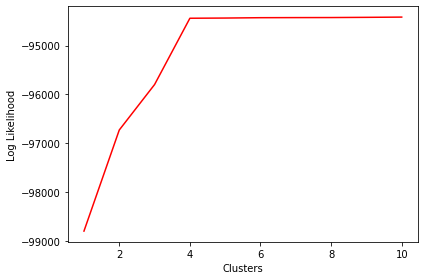

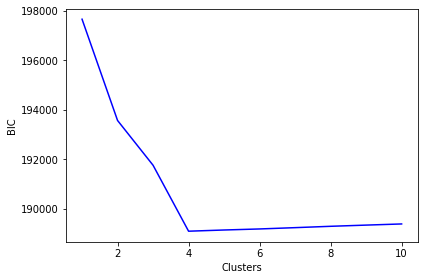

In [43]:

if __name__ == '__main__':
    np.random.seed(11)
    a = np.random.multivariate_normal([30, 40], [[75, 5], [5, 75]], size=10000)
    b = np.random.multivariate_normal([5, 25], [[16, 10], [10, 16]], size=750)
    c = np.random.multivariate_normal([60, 30], [[16, 0], [0, 16]], size=750)
    d = np.random.multivariate_normal([20, 70], [[35, 10], [10, 35]], size=1000)
    X = np.concatenate((a, b, c, d), axis=0)
    np.random.shuffle(X)
    best_k, best_result, l, b = BIC(X, kmin=1, kmax=10)
    print(best_k)
    print(best_result)
    print(l)
    print(b)
    x = np.arange(1, 11)
    plt.plot(x, l, 'r')
    plt.xlabel('Clusters')
    plt.ylabel('Log Likelihood')
    plt.tight_layout()
    plt.show()
    plt.plot(x, b, 'b')
    plt.xlabel('Clusters')
    plt.ylabel('BIC')
    plt.tight_layout()
    plt.show()

## 10. Hello, sklearn!

In [44]:
#!/usr/bin/env python3
""" Kmeans using sklearn """
#import numpy as np
import sklearn.cluster


def kmeans(X, k):
    """performs K-means on a dataset"""
    kmeans = sklearn.cluster.KMeans(n_clusters=k).fit(X)
    C = kmeans.cluster_centers_
    clss = kmeans.labels_
    return C, clss


[[20.0835633  69.81592298]
 [59.22766628 29.19796006]
 [30.06722465 40.41123947]
 [ 9.92511389 25.73098987]
 [39.62770705 19.89843487]]


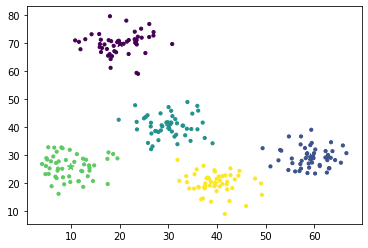

In [45]:
if __name__ == "__main__":
    np.random.seed(0)
    a = np.random.multivariate_normal([30, 40], [[16, 0], [0, 16]], size=50)
    b = np.random.multivariate_normal([10, 25], [[16, 0], [0, 16]], size=50)
    c = np.random.multivariate_normal([40, 20], [[16, 0], [0, 16]], size=50)
    d = np.random.multivariate_normal([60, 30], [[16, 0], [0, 16]], size=50)
    e = np.random.multivariate_normal([20, 70], [[16, 0], [0, 16]], size=50)
    X = np.concatenate((a, b, c, d, e), axis=0)
    np.random.shuffle(X)

    C, clss = kmeans(X, 5)
    print(C)
    plt.scatter(X[:, 0], X[:, 1], s=10, c=clss)
    plt.scatter(C[:, 0], C[:, 1], s=50, marker='*', c=list(range(5)))
    plt.show()

## 11. GMM:


In [46]:
#!/usr/bin/env python3
import sklearn.mixture


def gmm(X, k):
    """calculates a GMM from a dataset"""
    g = sklearn.mixture.GaussianMixture(n_components=k)
    # Generate random observations with two modes centered on 0
    # and 10 to use for training.
    g.fit(X) 
    pi = g.weights_
    m = g.means_
    S = g.covariances_

    clss = g.predict(X)
    bic = g.bic(X)

    return pi, m, S, clss, bic



[0.06056715 0.15664423 0.07861691 0.70417171]
[[60.23243716 30.22540976]
 [17.23466059 32.21829334]
 [20.00760431 70.01916458]
 [30.5901298  40.64433308]]
[[[ 1.65441658e+01  9.58167200e-02]
  [ 9.58167200e-02  1.65751132e+01]]

 [[ 1.42279616e+02  7.97904717e+01]
  [ 7.97904717e+01  6.38223627e+01]]

 [[ 3.54622294e+01  1.12790828e+01]
  [ 1.12790828e+01  3.20886074e+01]]

 [[ 7.09564499e+01 -2.22335546e+00]
  [-2.22335546e+00  7.78124575e+01]]]
189729.73950241003


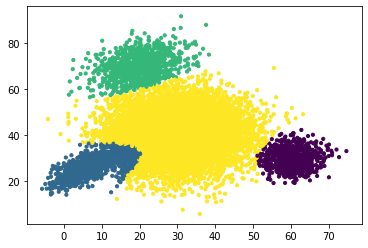

In [47]:
if __name__ == '__main__':
    np.random.seed(11)
    a = np.random.multivariate_normal([30, 40], [[75, 5], [5, 75]], size=10000)
    b = np.random.multivariate_normal([5, 25], [[16, 10], [10, 16]], size=750)
    c = np.random.multivariate_normal([60, 30], [[16, 0], [0, 16]], size=750)
    d = np.random.multivariate_normal([20, 70], [[35, 10], [10, 35]], size=1000)
    X = np.concatenate((a, b, c, d), axis=0)
    np.random.shuffle(X)

    pi, m, S, clss, bic = gmm(X, 4)
    print(pi)
    print(m)
    print(S)
    print(bic)
    plt.scatter(X[:, 0], X[:, 1], s=10, c=clss)
    plt.scatter(m[:, 0], m[:, 1], s=50, marker='*', c=list(range(4)))
    plt.show()

## 12. Agglomerative

In [53]:
#!/usr/bin/env python3
""" Agglomerative """
import scipy.cluster.hierarchy
import matplotlib.pyplot as plt


def agglomerative(X, dist):
    """ perform agglomerative clustering on a dataset """
    h = scipy.cluster.hierarchy
    Z = h.linkage(X, 'ward')
    ind = h.fcluster(Z, t=dist, criterion="distance")
    fig = plt.figure()
    dn = h.dendrogram(Z, color_threshold=dist)
    plt.show()
    return ind


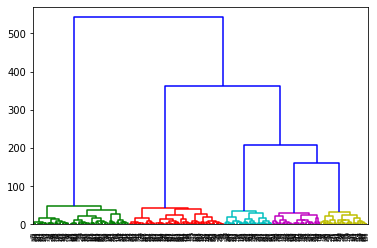

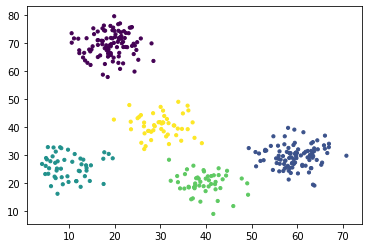

In [54]:

if __name__ == '__main__':
    np.random.seed(0)
    a = np.random.multivariate_normal([30, 40], [[16, 0], [0, 16]], size=50)
    b = np.random.multivariate_normal([10, 25], [[16, 0], [0, 16]], size=50)
    c = np.random.multivariate_normal([40, 20], [[16, 0], [0, 16]], size=50)
    d = np.random.multivariate_normal([60, 30], [[16, 0], [0, 16]], size=100)
    e = np.random.multivariate_normal([20, 70], [[16, 0], [0, 16]], size=100)
    X = np.concatenate((a, b, c, d, e), axis=0)
    np.random.shuffle(X)

    clss = agglomerative(X, 100)
    plt.scatter(X[:, 0], X[:, 1], s=10, c=clss)
    plt.show()